In [1]:
%pylab inline
import sys
import rootpath
sys.path.append(rootpath.detect())

Populating the interactive namespace from numpy and matplotlib


In [2]:
## spehere parameters
r = 1      # sphere radius
N = 1000   # number of points 

## Random, uniform distributed points 

### method 1
Points allocated according to method 1 described in:

@article{deserno2004generate,
  title={How to generate equidistributed points on the surface of a sphere},
  author={Deserno, Markus},
  journal={If Polymerforshung (Ed.)},
  pages={99},
  year={2004}
}

In [1]:
z = random.uniform(-r, r, N)
g = random.uniform(0, 2*pi, N)

x = sqrt(r**2-z**2)*cos(g)
y = sqrt(r**2-z**2)*sin(g)

fig0 = figure(figsize=[10,10])
ax0 = fig0.gca(projection="3d")
ax0.scatter(x, y, z, s=5)
x.shape

NameError: name 'random' is not defined

### Method 2
Points allocated according to gaussian distribuiton projected to r sphere 

In [161]:
def normalise_length(points):
    magnitudes = sqrt(diag(dot(points, points.T)))
    return points/magnitudes.reshape(-1,1)

In [162]:
gaussian_points = random.randn(N, 3)
scaled_points = normalise_length(gaussian_points)*r
scaled_points.shape

(1000, 3)

(1000, 3)

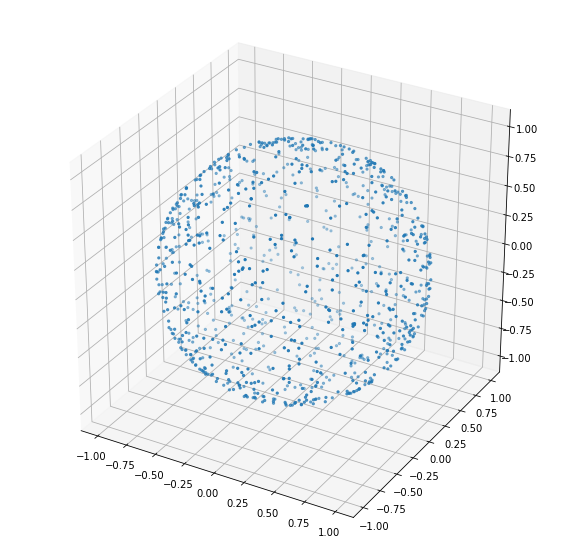

In [163]:
fig1 = figure(figsize=[10,10])
ax1 = fig1.gca(projection="3d")
ax1.scatter(*scaled_points.T, s=5)
scaled_points.shape

## Regularly  distributed points 

### method 1
Points allocated according to method 2 described in:

@article{deserno2004generate,
  title={How to generate equidistributed points on the surface of a sphere},
  author={Deserno, Markus},
  journal={If Polymerforshung (Ed.)},
  pages={99},
  year={2004}
}


In [153]:
def gen_point(theta, gamma, r):
    x = r*sin(theta)*cos(gamma)
    y = r*sin(theta)*sin(gamma)
    z = r*cos(theta)
    return np.array([x, y, z]).reshape(1, -1)


In [154]:
points = np.zeros((N, 3))
N_count = 0
a = 4*pi*r**2/N
d = sqrt(a)

M_t = int(pi/d)
d_t = pi/M_t
d_g = a/d_t

for m in range(M_t-1):
    theta = pi*(m+0.5)/M_t
    M_g = int(2*pi*sin(theta)/d_g)
    for n in range(M_g-1):
        gamma = 2*pi*n/M_g
        points[N_count] = gen_point(theta, gamma, r)
        N_count +=1

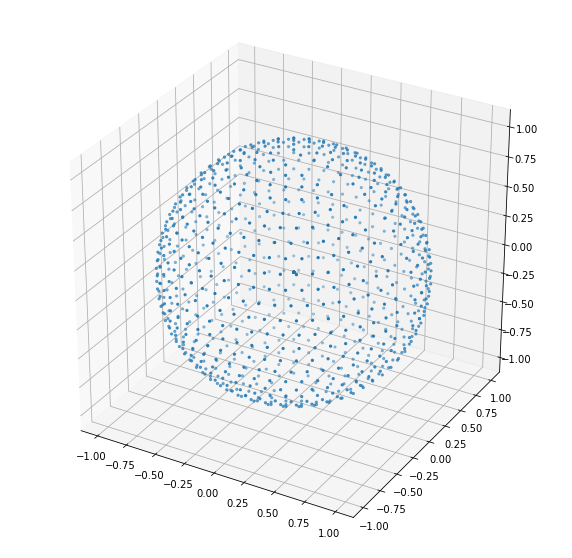

In [155]:
fig2 = figure(figsize=[10,10])
ax2 = fig2.gca(projection="3d")
ax2.scatter(*points.T, s=5)

### method 2
uniform sample on simplex and project to r sphere

In [156]:
def f1(x):
    x = x.reshape(-1)
    assert x.shape[0]==3
    return 2*np.prod([1-np.cos((xi*np.pi)/2) for xi in x[:-1]])

def fm_1(x):
    x = x.reshape(-1)
    assert x.shape[0]==3
    return 2*(3-1)*(1-np.cos(np.pi/2*x[0]))*(1-np.sin(np.pi/2*x[1]))

def fm(x):
    x = x.reshape(-1)
    assert x.shape[0]==3
    return 2*M*(1-(x[0]*np.cos(5*np.pi*x[0])**2))

def f(x):
    return np.array([[f1(xi), fm_1(xi), fm(xi)] for xi in x])

In [157]:
H = 15
sj = np.array([i/H for i in range(H+1)])
sj.shape

(16,)

In [158]:
from itertools import product 
combs= product(sj, repeat=3)
s = []
for comb in combs:
    sum_comb = np.sum(comb)
    if np.round_(np.sum(comb), decimals=9)==1.0:
        print("added: ",len(s), end="\r")
        s.append(comb)
s = np.array(s)
sn = normalise_length(s)*r
print(s.shape)
print(sn.shape)

(136, 3)13550
(136, 3)


In [159]:
# reflections into full sphere
pows = product([-1,1], repeat=3)
S = []
for p in pows:
    p = np.array(p)
    S.append(p*s)
    
S = np.vstack(S)
Sn = normalise_length(S)*r
print(S.shape)
print(Sn.shape)

(1088, 3)
(1088, 3)


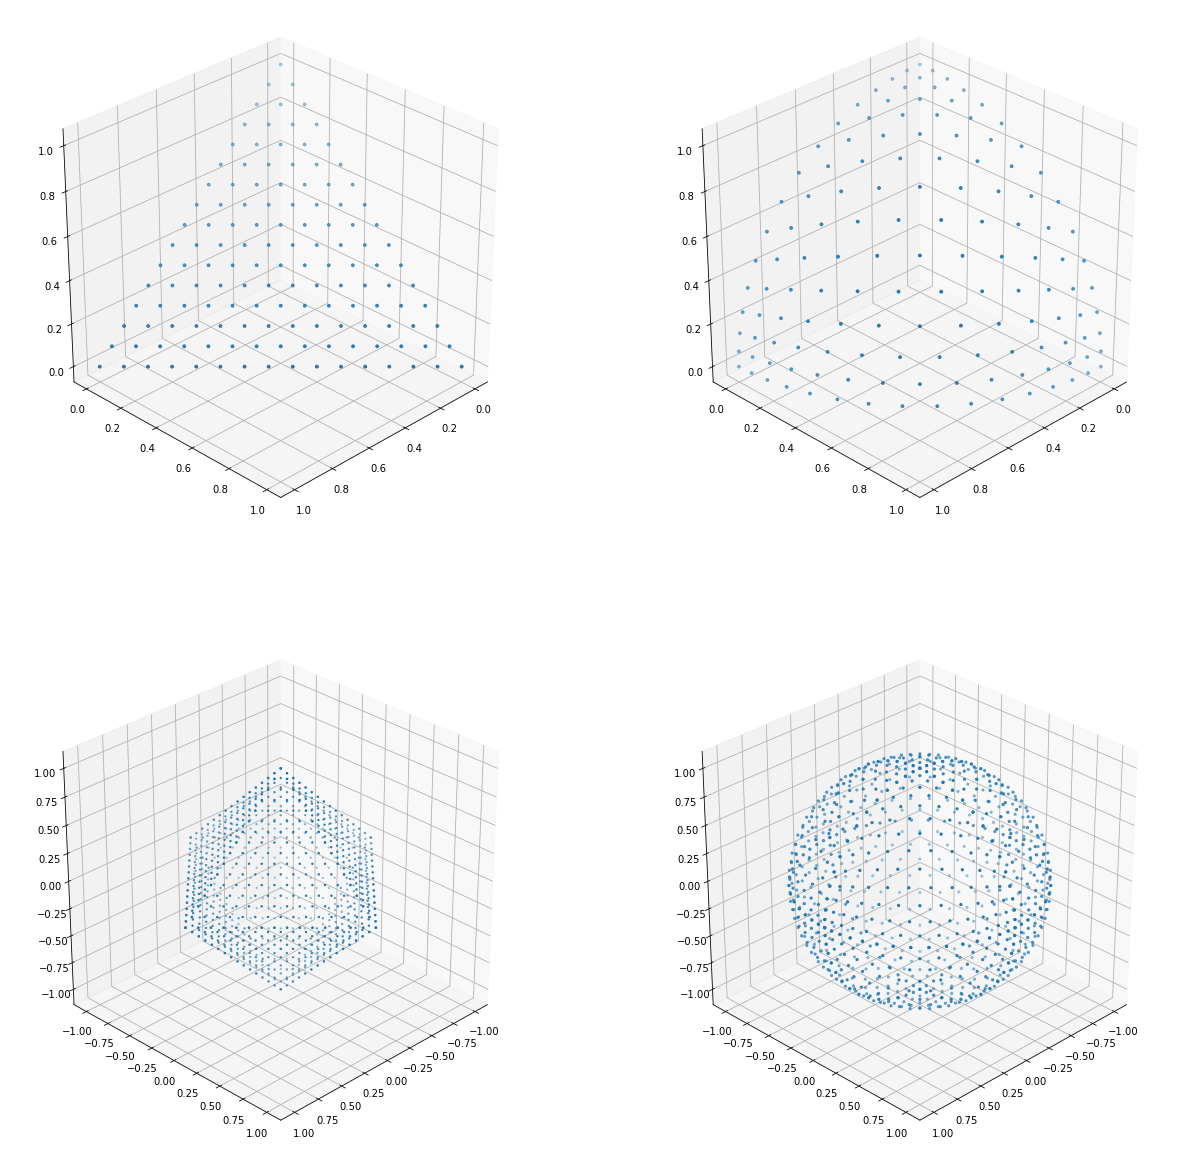

In [160]:
fig3 = figure(figsize=[21,21])
ax3_0 = fig3.add_subplot(2,2,1, projection="3d")
ax3_1 = fig3.add_subplot(2,2,2, projection="3d")
ax3_2 = fig3.add_subplot(2,2,3, projection="3d")
ax3_3 = fig3.add_subplot(2,2,4, projection="3d")

ax3_0.scatter(*s.T, s=8)
ax3_0.view_init(30, 45)

ax3_1.scatter(*sn.T, s=8)
ax3_1.view_init(30, 45)

ax3_2.scatter(*S.T, s=2)
ax3_2.view_init(30, 45)

ax3_3.scatter(*Sn.T, s=5)
ax3_3.view_init(30, 45)